In [ ]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PostgreSQL connection
# Database, username, password
db_params = {
    'host': 'localhost',
    'database': '{your_database}', 
    'user': '{your_username}',               
    'password': '{your_pass}',        
    'port': '5432'
}

try:
    # Connect
    conn = psycopg2.connect(**db_params)
    print("The PostgreSQL database is connected.")

    # SQL query
    # table name is 'new_car_registrations_long'
    sql_query = "SELECT * FROM public.new_car_registrations_long;"
    df = pd.read_sql(sql_query, conn)

    print("\nThe data was successfully imported into the DataFrame.")
    print("First 5 rows:")
    print(df.head())
    print("\nDataFrame Info:")
    df.info()

except Exception as e:
    print(f"The database connection error: {e}")

finally:
    # Close connection
    if 'conn' in locals() and conn:
        conn.close()
        print("The database connection has been closed.")

The PostgreSQL database is connected.

The data was successfully imported into the DataFrame.
First 5 rows:
  freq unit mot_nrg       engine geo  year  registration_count
0    A   NR     DIE  CC1400-1999  AT  1970                 NaN
1    A   NR     DIE  CC1400-1999  BA  1970                 NaN
2    A   NR     DIE  CC1400-1999  BE  1970                 NaN
3    A   NR     DIE  CC1400-1999  CH  1970                 NaN
4    A   NR     DIE  CC1400-1999  CY  1970                 NaN

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16121 entries, 0 to 16120
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   freq                16121 non-null  object 
 1   unit                16121 non-null  object 
 2   mot_nrg             16121 non-null  object 
 3   engine              16121 non-null  object 
 4   geo                 16121 non-null  object 
 5   year                16121 non-null  int64

C:\Users\dogan\AppData\Local\Temp\ipykernel_2404\3938950938.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


In [31]:
print(f"DataFrame size (rows, columns): {df.shape}")

DataFrame size (rows, columns): (16121, 7)


In [32]:
print("\nDataFrame info:")
df.info()


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16121 entries, 0 to 16120
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   freq                16121 non-null  object 
 1   unit                16121 non-null  object 
 2   mot_nrg             16121 non-null  object 
 3   engine              16121 non-null  object 
 4   geo                 16121 non-null  object 
 5   year                16121 non-null  int64  
 6   registration_count  6059 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 881.7+ KB


In [33]:
print("\nStatistical summary:")
print(df.describe())


Statistical summary:
               year  registration_count
count  16121.000000        6.059000e+03
mean    1999.787234        2.425247e+05
std       13.959242        6.832949e+05
min     1970.000000        0.000000e+00
25%     1988.000000        4.685500e+03
50%     2000.000000        3.370000e+04
75%     2012.000000        1.697755e+05
max     2023.000000        1.323577e+07


In [34]:
print("\nUnique variables and values:")
for col in ['freq', 'unit', 'mot_nrg', 'engine', 'geo']:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Unique variables and values:

Column: freq
freq
A    16121
Name: count, dtype: int64

Column: unit
unit
NR    16121
Name: count, dtype: int64

Column: mot_nrg
mot_nrg
DIE      7050
PET      7050
TOTAL    2021
Name: count, dtype: int64

Column: engine
engine
TOTAL          5969
CC1400-1999    3384
CC_GE2000      3384
CC_LT1400      3384
Name: count, dtype: int64

Column: geo
geo
AT           423
BA           423
BE           423
CH           423
CY           423
CZ           423
DE           423
EE           423
EL           423
ES           423
FI           423
FR           423
GE           423
HR           423
HU           423
IE           423
IS           423
IT           423
LI           423
LT           423
LU           423
LV           423
MD           423
ME           423
MT           423
NO           423
PL           423
PT           423
RO           423
RS           423
SE           423
SI           423
TR           423
UA           423
UK           423
XK           423
AL    

In [35]:
print("\nMissing values (NaN):")
print(df.isnull().sum())


Missing values (NaN):
freq                      0
unit                      0
mot_nrg                   0
engine                    0
geo                       0
year                      0
registration_count    10062
dtype: int64



'freq' and 'unit' columns were dropped.
  mot_nrg       engine geo  year  registration_count
0     DIE  CC1400-1999  AT  1970                 NaN
1     DIE  CC1400-1999  BA  1970                 NaN
2     DIE  CC1400-1999  BE  1970                 NaN
3     DIE  CC1400-1999  CH  1970                 NaN
4     DIE  CC1400-1999  CY  1970                 NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16121 entries, 0 to 16120
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mot_nrg             16121 non-null  object 
 1   engine              16121 non-null  object 
 2   geo                 16121 non-null  object 
 3   year                16121 non-null  int64  
 4   registration_count  6059 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 629.9+ KB
None


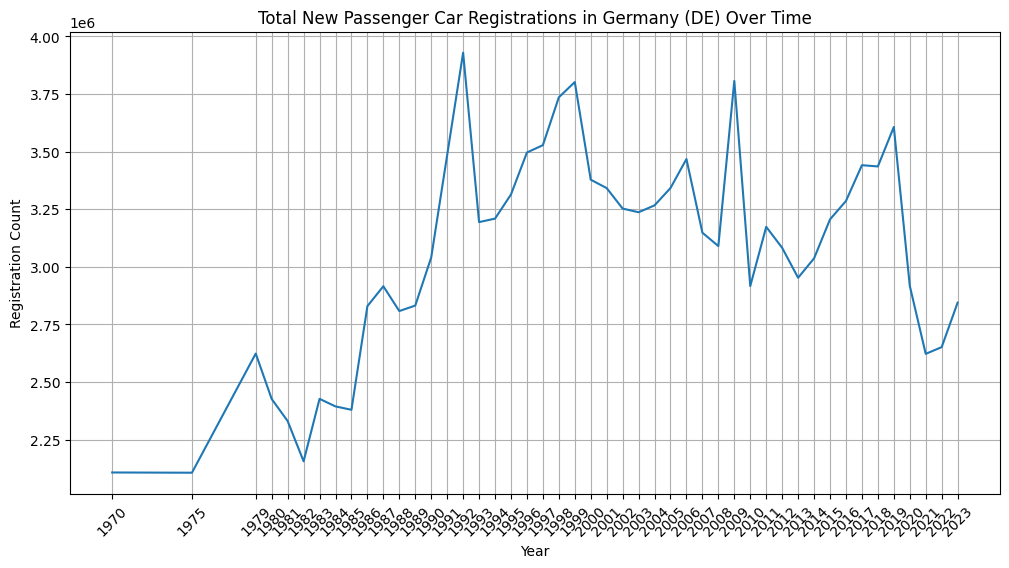

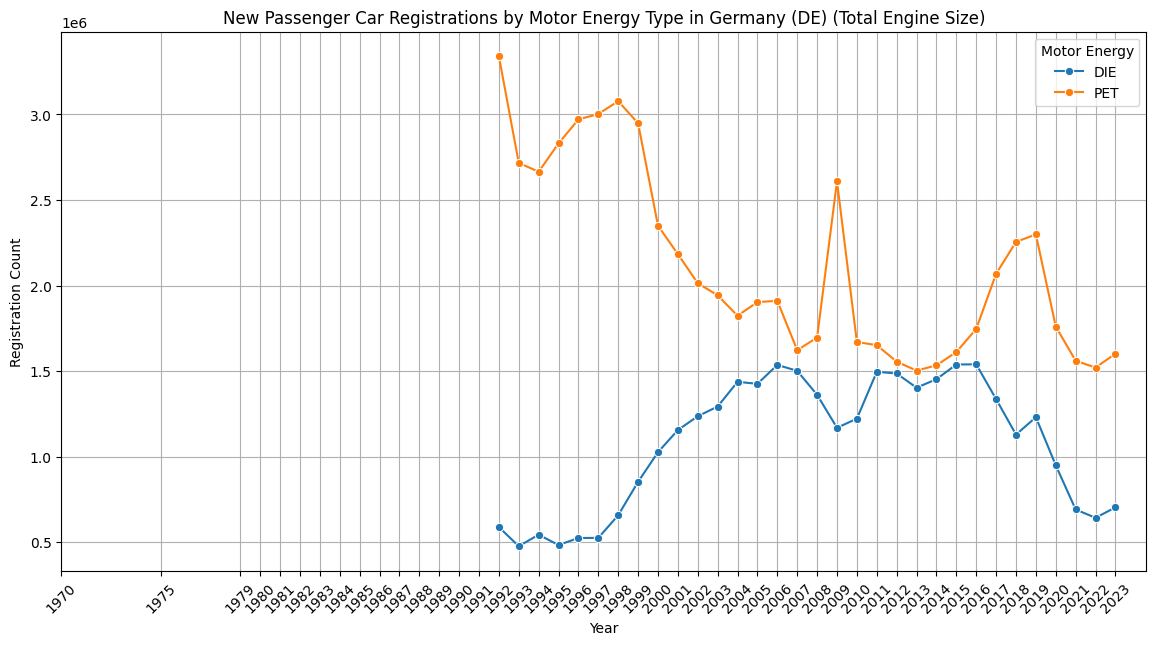

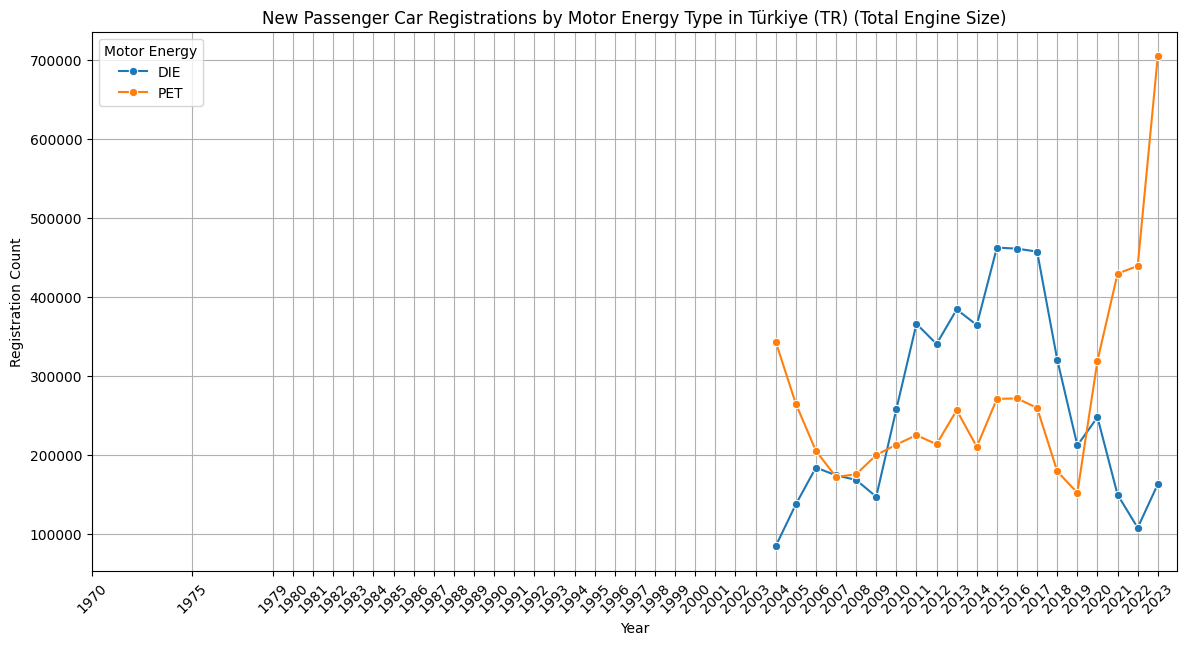

In [36]:
# --- 1. Dropping Unnecessary Columns ---
# dropping 'freq' and 'unit' columns
df = df.drop(columns=['freq', 'unit'])
print("\n'freq' and 'unit' columns were dropped.")
print(df.head())
print(df.info())

# --- 2. Managing Missing Values (For Visualization) ---
# NaN values will not be plotted automatically when plotting trend charts, this is fine for now.
# However, it will be necessary to take NaNs into account when taking totals or in some calculations.

# --- 3. Basic Visualizations ---

# 3.1. Total Registration Trend (All countries, all engine types)
# Let's plot the overall trend for 'TOTAL' motor energy and 'TOTAL' motor size only,
# because the other categories are subsets of this total.
# We can also filter for a specific country or region

# Let's filter only for TOTAL categories and DE

import matplotlib.ticker as mticker

df_total_de = df[(df['mot_nrg'] == 'TOTAL') &
                 (df['engine'] == 'TOTAL') &
                 (df['geo'] == 'DE')]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_total_de, x='year', y='registration_count')
plt.title('Total New Passenger Car Registrations in Germany (DE) Over Time')
plt.xlabel('Year')
plt.ylabel('Registration Count')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True)) # Ensure integer ticks
plt.xticks(df_total_de['year'].unique(), rotation=45) # Show only unique years from data, rotate for readability
plt.show()

# 3.2. Registration Trend by Main Engine Energy Types (DE, TOTAL Engine Size)
# ‘TOTAL’ excluding engine energy, let's analyze the main types like PET, DIE.
df_fuel_types_de = df[(df['mot_nrg'] != 'TOTAL') &
                      (df['engine'] == 'TOTAL') &
                      (df['geo'] == 'DE')]

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_fuel_types_de, x='year', y='registration_count', hue='mot_nrg', marker='o')
plt.title('New Passenger Car Registrations by Motor Energy Type in Germany (DE) (Total Engine Size)')
plt.xlabel('Year')
plt.ylabel('Registration Count')
plt.legend(title='Motor Energy')
plt.grid(True)
# Optional: Set x-axis ticks
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.xticks(df_fuel_types_de['year'].unique(), rotation=45)
plt.show()

# 3.3. Diesel, Gasoline Vehicle Trends for Türkiye (TOTAL Engine Size)
df_fuel_types_tr = df[(df['mot_nrg'] != 'TOTAL') &
                      (df['engine'] == 'TOTAL') &
                      (df['geo'] == 'TR')]

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_fuel_types_tr, x='year', y='registration_count', hue='mot_nrg', marker='o')
plt.title('New Passenger Car Registrations by Motor Energy Type in Türkiye (TR) (Total Engine Size)')
plt.xlabel('Year')
plt.ylabel('Registration Count')
plt.legend(title='Motor Energy')
plt.grid(True)
# Optional: Set x-axis ticks
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.xticks(df_fuel_types_tr['year'].unique(), rotation=45)
plt.show()



First 5 rows after Market Share Calculation:
  mot_nrg       engine geo  year  registration_count  total_geo_registrations  \
0     DIE  CC1400-1999  AT  1970                 NaN                      0.0   
1     DIE  CC1400-1999  BA  1970                 NaN                      0.0   
2     DIE  CC1400-1999  BE  1970                 NaN                      0.0   
3     DIE  CC1400-1999  CH  1970                 NaN                      0.0   
4     DIE  CC1400-1999  CY  1970                 NaN                      0.0   

   market_share  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  

DataFrame Info after Market Share Calculation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10152 entries, 0 to 10151
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mot_nrg                  10152 non-null  object 
 1   engine                   10152 non-n

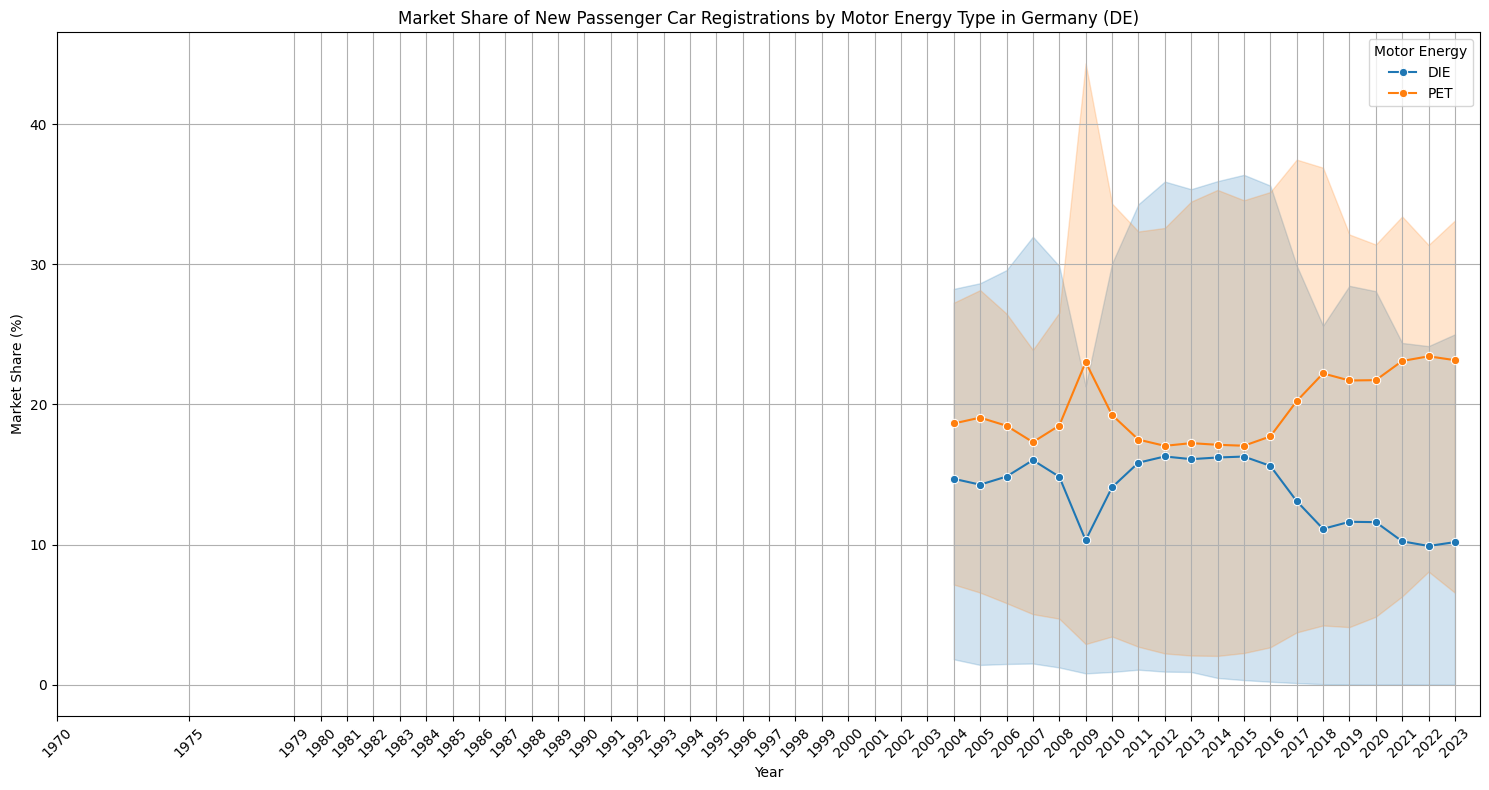

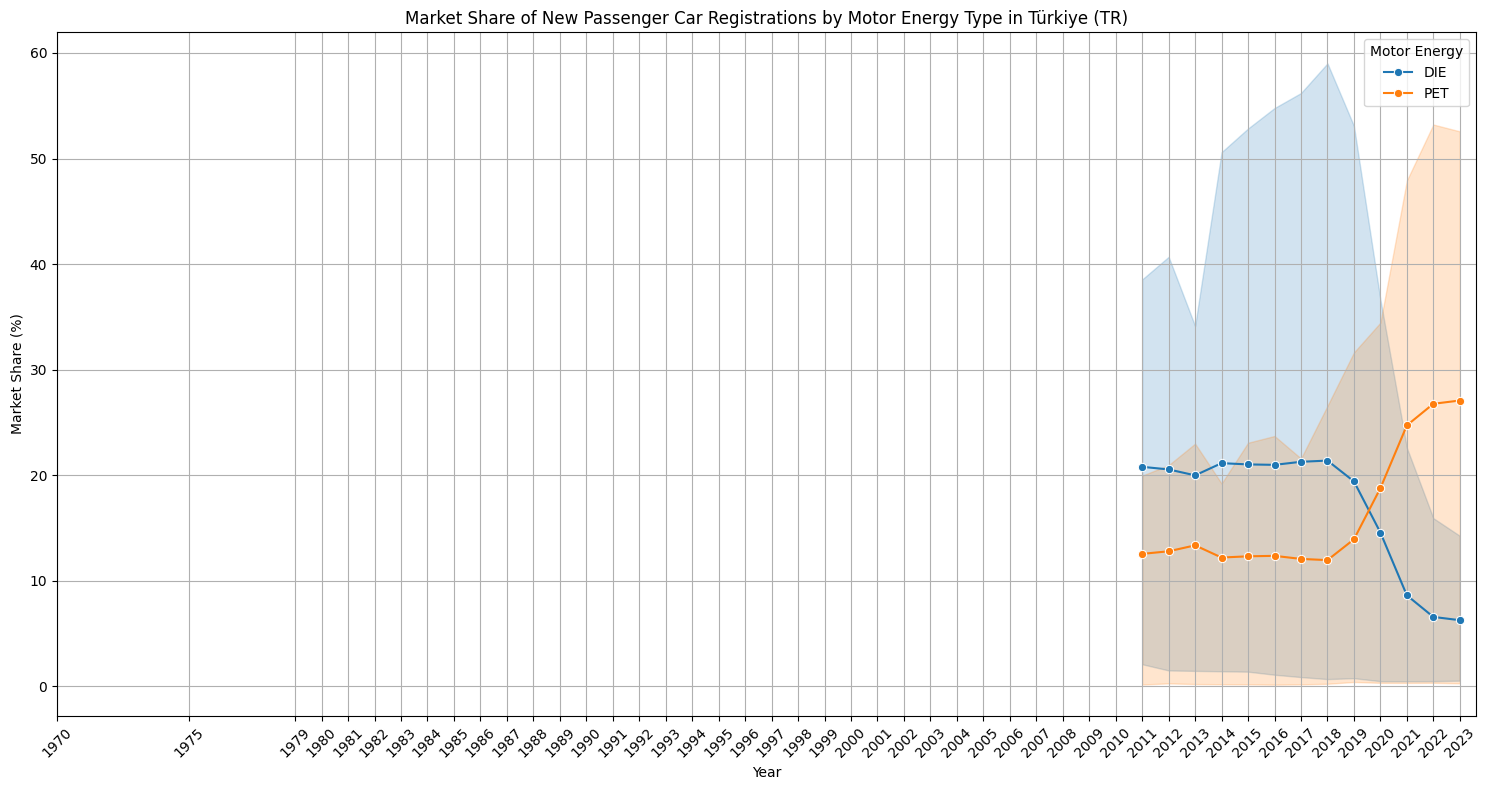

In [37]:
import matplotlib.ticker as mticker # Import for x-axis tick formatting

# --- 4. Data Preparation for Market Share Analysis ---

# Filter out 'TOTAL' categories for both motor energy and engine size.
df_filtered = df[(df['mot_nrg'] != 'TOTAL') & (df['engine'] != 'TOTAL')]

# Calculate total registrations per year and geographical entity (country/region).
# This sum will serve as the denominator for market share calculation.
total_registrations_per_year_geo = df_filtered.groupby(['year', 'geo'])['registration_count'].sum().reset_index()
total_registrations_per_year_geo = total_registrations_per_year_geo.rename(columns={'registration_count': 'total_geo_registrations'})

# Merge the total registrations back into the filtered DataFrame.
# This aligns each specific registration count with its corresponding total for the year/geo.
df_merged = pd.merge(df_filtered, total_registrations_per_year_geo, on=['year', 'geo'], how='left')

# Calculate the market share for each specific motor energy type within its year and geographical entity.
# If 'registration_count' is NaN, 'market_share' will also be NaN.
df_merged['market_share'] = (df_merged['registration_count'] / df_merged['total_geo_registrations']) * 100

print("\nFirst 5 rows after Market Share Calculation:")
print(df_merged.head())
print("\nDataFrame Info after Market Share Calculation:")
df_merged.info()


# --- 5. Market Share Visualizations ---

# 5.1. Market Share Trends for Motor Energy Types in Germany (DE)
df_de_market_share = df_merged[df_merged['geo'] == 'DE']

plt.figure(figsize=(15, 8))
sns.lineplot(data=df_de_market_share, x='year', y='market_share', hue='mot_nrg', marker='o')
plt.title('Market Share of New Passenger Car Registrations by Motor Energy Type in Germany (DE)')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.legend(title='Motor Energy')
plt.grid(True)
# Set x-axis ticks to show only integer years present in the data
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.xticks(df_de_market_share['year'].unique(), rotation=45)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


# 5.2. Market Share Trends for Motor Energy Types in Türkiye (TR)
df_tr_market_share = df_merged[df_merged['geo'] == 'TR']

plt.figure(figsize=(15, 8))
sns.lineplot(data=df_tr_market_share, x='year', y='market_share', hue='mot_nrg', marker='o')
plt.title('Market Share of New Passenger Car Registrations by Motor Energy Type in Türkiye (TR)')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.legend(title='Motor Energy')
plt.grid(True)
# Set x-axis ticks to show only integer years present in the data
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.xticks(df_tr_market_share['year'].unique(), rotation=45)
plt.tight_layout()
plt.show()


First 5 rows of Corrected Engine Market Share DataFrame:
    year geo       engine  registration_count  overall_total_registrations  \
6   1970  BE  CC1400-1999                 0.0                     295701.0   
7   1970  BE    CC_GE2000                 0.0                     295701.0   
8   1970  BE    CC_LT1400                 0.0                     295701.0   
18  1970  DE  CC1400-1999                 0.0                    2107123.0   
19  1970  DE    CC_GE2000                 0.0                    2107123.0   

    market_share  
6            0.0  
7            0.0  
8            0.0  
18           0.0  
19           0.0  

Corrected Engine Market Share DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 3243 entries, 6 to 5072
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         3243 non-null   int64  
 1   geo                          324

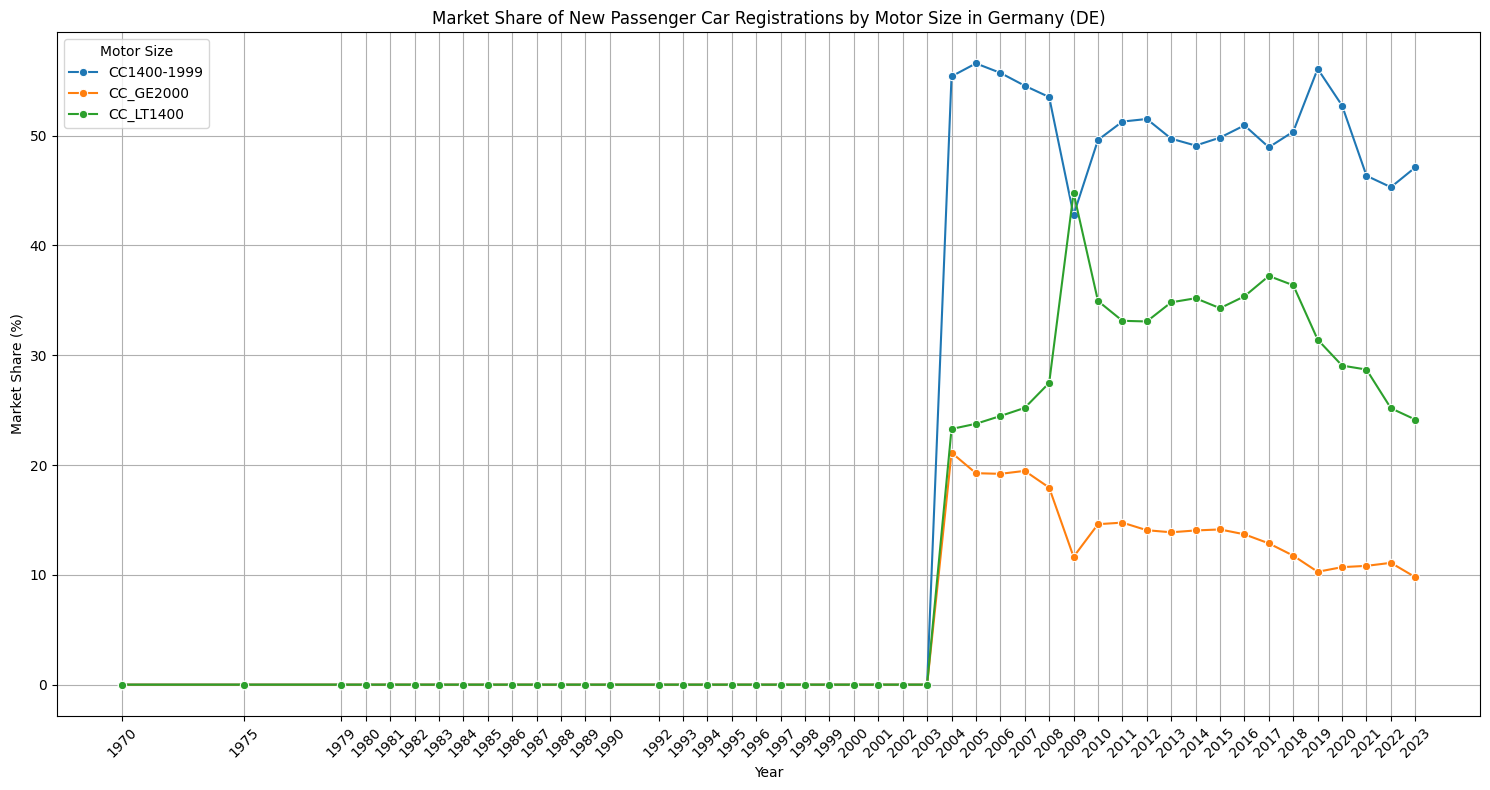

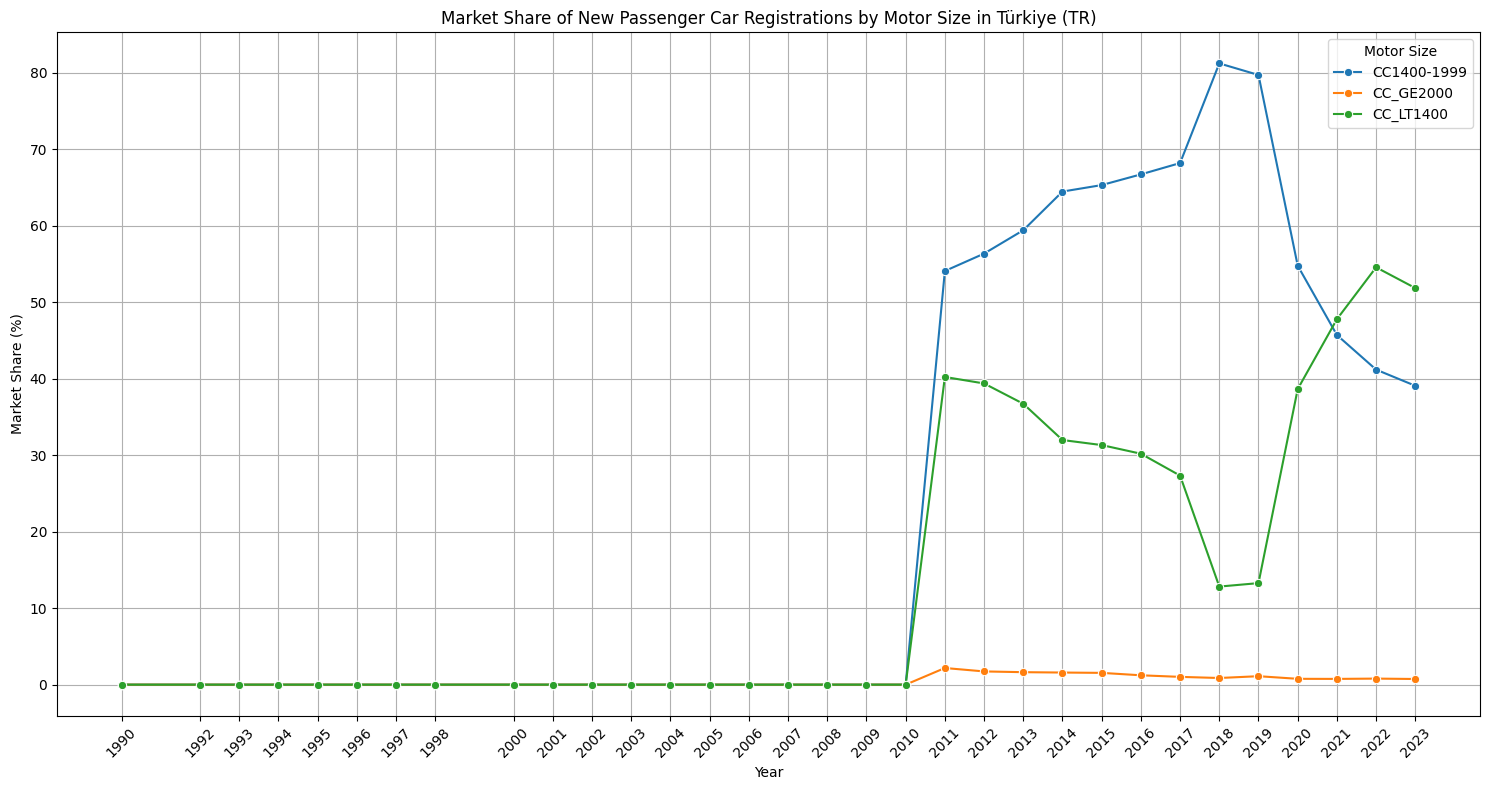

In [38]:
# --- 6. Data Preparation for Motor Size Market Share Analysis ---
df_overall_total_market = df[(df['mot_nrg'] == 'TOTAL') &
                             (df['engine'] == 'TOTAL')].copy()
df_overall_total_market = df_overall_total_market[['year', 'geo', 'registration_count']]
df_overall_total_market = df_overall_total_market.rename(columns={'registration_count': 'overall_total_registrations'})

df_engine_numerator = df[(df['mot_nrg'] != 'TOTAL') &
                         (df['engine'] != 'TOTAL')].copy()

df_engine_numerator_grouped = df_engine_numerator.groupby(['year', 'geo', 'engine'])['registration_count'].sum().reset_index()


df_engine_market_share_corrected = pd.merge(
    df_engine_numerator_grouped,
    df_overall_total_market,
    on=['year', 'geo'],
    how='left'
)

df_engine_market_share_corrected['market_share'] = (
    df_engine_market_share_corrected['registration_count'] / df_engine_market_share_corrected['overall_total_registrations']
) * 100

df_engine_market_share_corrected = df_engine_market_share_corrected.dropna(subset=['market_share'])

print("\nFirst 5 rows of Corrected Engine Market Share DataFrame:")
print(df_engine_market_share_corrected.head())
print("\nCorrected Engine Market Share DataFrame Info:")
df_engine_market_share_corrected.info()

# --- 7. Motor Size Market Share Visualizations ---

# 7.1. Germany (DE) for Motor Size Market Share Trends
df_de_engine_market_share_plot = df_engine_market_share_corrected[df_engine_market_share_corrected['geo'] == 'DE']

plt.figure(figsize=(15, 8))
sns.lineplot(data=df_de_engine_market_share_plot, x='year', y='market_share', hue='engine', marker='o')
plt.title('Market Share of New Passenger Car Registrations by Motor Size in Germany (DE)')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.legend(title='Motor Size')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.xticks(df_de_engine_market_share_plot['year'].unique(), rotation=45)
plt.tight_layout()
plt.show()

# 7.2. Türkiye (TR) for Motor Size Market Share Trends
df_tr_engine_market_share_plot = df_engine_market_share_corrected[df_engine_market_share_corrected['geo'] == 'TR']

plt.figure(figsize=(15, 8))
sns.lineplot(data=df_tr_engine_market_share_plot, x='year', y='market_share', hue='engine', marker='o')
plt.title('Market Share of New Passenger Car Registrations by Motor Size in Türkiye (TR)')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.legend(title='Motor Size')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.xticks(df_tr_engine_market_share_plot['year'].unique(), rotation=45)
plt.tight_layout()
plt.show()

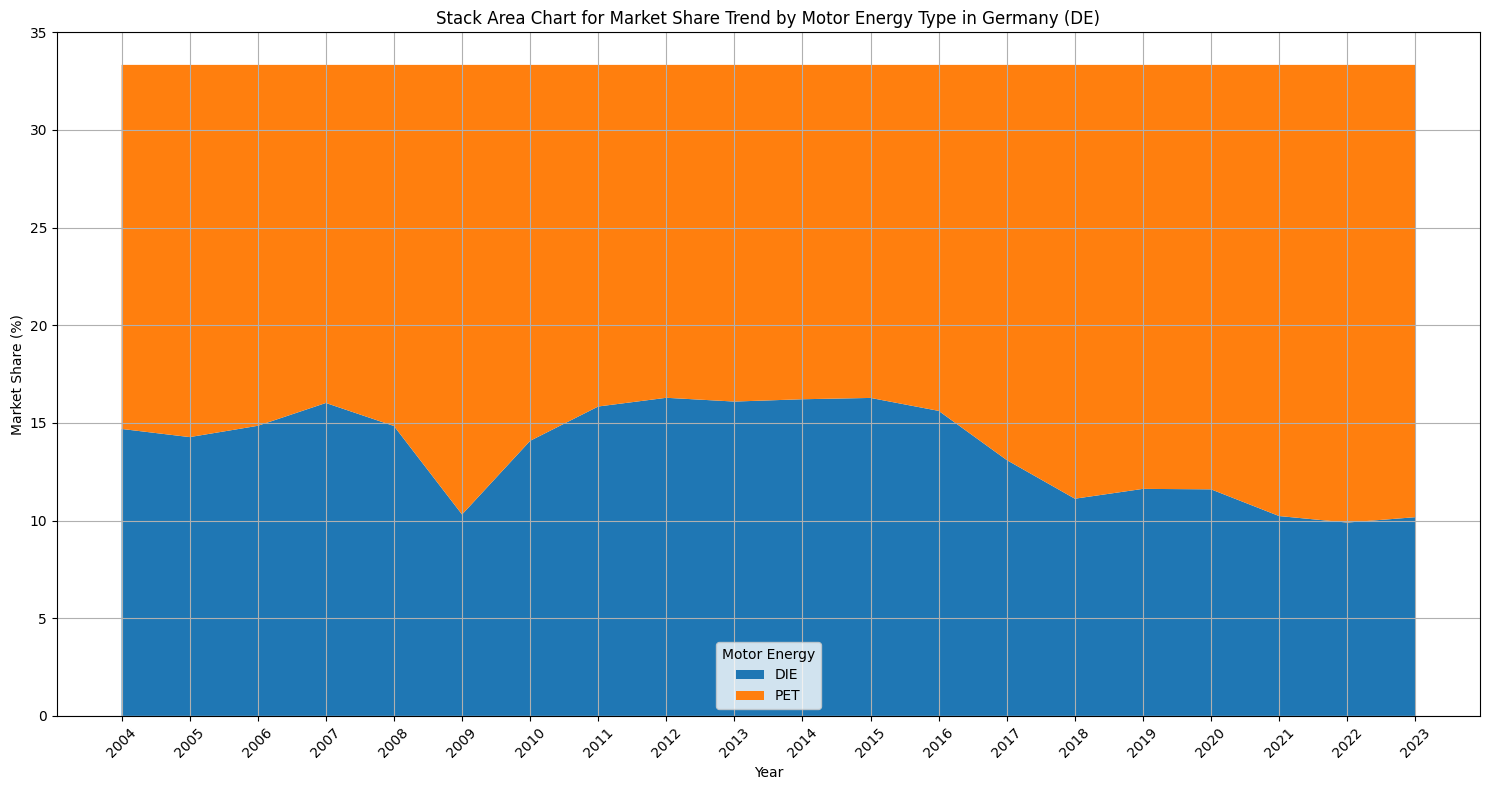

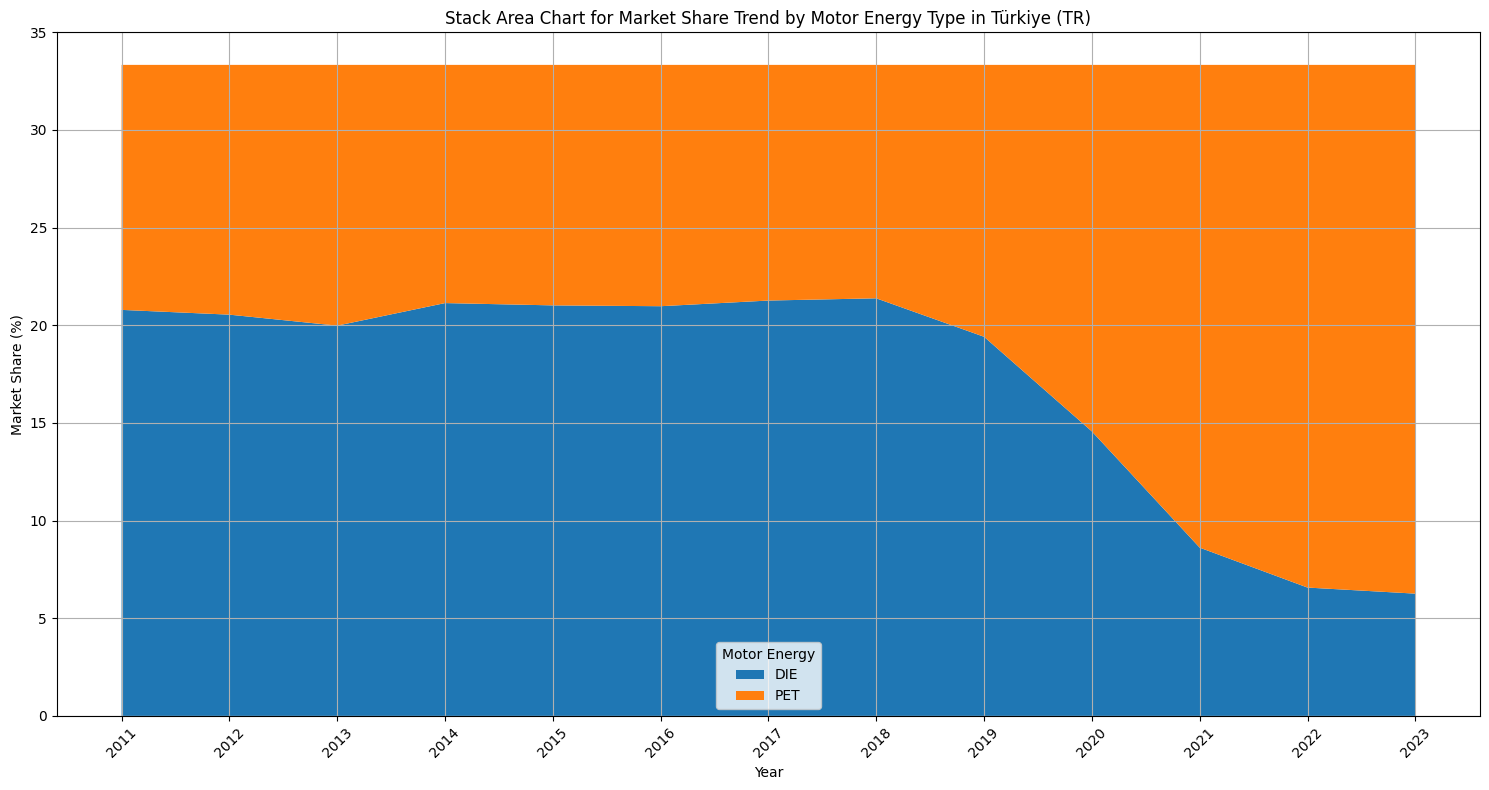

In [39]:
# --- 8. Stack Area Charts for Market Share Trends by Motor Energy Type

# Filter data for Germany (DE) and Türkiye (TR) for plotting
df_de_market_share_for_stack = df_merged[df_merged['geo'] == 'DE'].copy()
df_tr_market_share_for_stack = df_merged[df_merged['geo'] == 'TR'].copy()

# Ensure market_share column has no NaNs for plotting
df_de_market_share_for_stack.dropna(subset=['market_share'], inplace=True)
df_tr_market_share_for_stack.dropna(subset=['market_share'], inplace=True)

# Sort by year to ensure correct plotting order
df_de_market_share_for_stack.sort_values(by='year', inplace=True)
df_tr_market_share_for_stack.sort_values(by='year', inplace=True)

# 8.1 Germany (DE) - Motor Energy Stacked Area Chart

# Pivot the data for stackplot: index is year, columns are mot_nrg, values are market_share
# Fill NaN values with 0 if a mot_nrg type doesn't exist for a certain year, so stackplot works correctly.
de_pivot_data = df_de_market_share_for_stack.pivot_table(index='year', columns='mot_nrg', values='market_share', fill_value=0)

# Get the years for x-axis
years_de = de_pivot_data.index
# Get the motor energy types (columns) for stacking
mot_nrg_types_de = de_pivot_data.columns

# Prepare the data for stackplot - each list/array is a layer
data_for_stack_de = [de_pivot_data[col].values for col in mot_nrg_types_de]

plt.figure(figsize=(15, 8))
plt.stackplot(years_de, *data_for_stack_de, labels=mot_nrg_types_de)
plt.title('Stack Area Chart for Market Share Trend by Motor Energy Type in Germany (DE)')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.legend(title='Motor Energy')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.xticks(df_de_market_share_for_stack['year'].unique(), rotation=45)
plt.tight_layout()
plt.show()

# 8.2 Türkiye (TR) - Motor Energy Stacked Area Chart

tr_pivot_data = df_tr_market_share_for_stack.pivot_table(index='year', columns='mot_nrg', values='market_share', fill_value=0)

years_tr = tr_pivot_data.index
mot_nrg_types_tr = tr_pivot_data.columns

data_for_stack_tr = [tr_pivot_data[col].values for col in mot_nrg_types_tr]

plt.figure(figsize=(15, 8))
plt.stackplot(years_tr, *data_for_stack_tr, labels=mot_nrg_types_tr)
plt.title('Stack Area Chart for Market Share Trend by Motor Energy Type in Türkiye (TR)')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.legend(title='Motor Energy')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.xticks(df_tr_market_share_for_stack['year'].unique(), rotation=45)
plt.tight_layout()
plt.show()

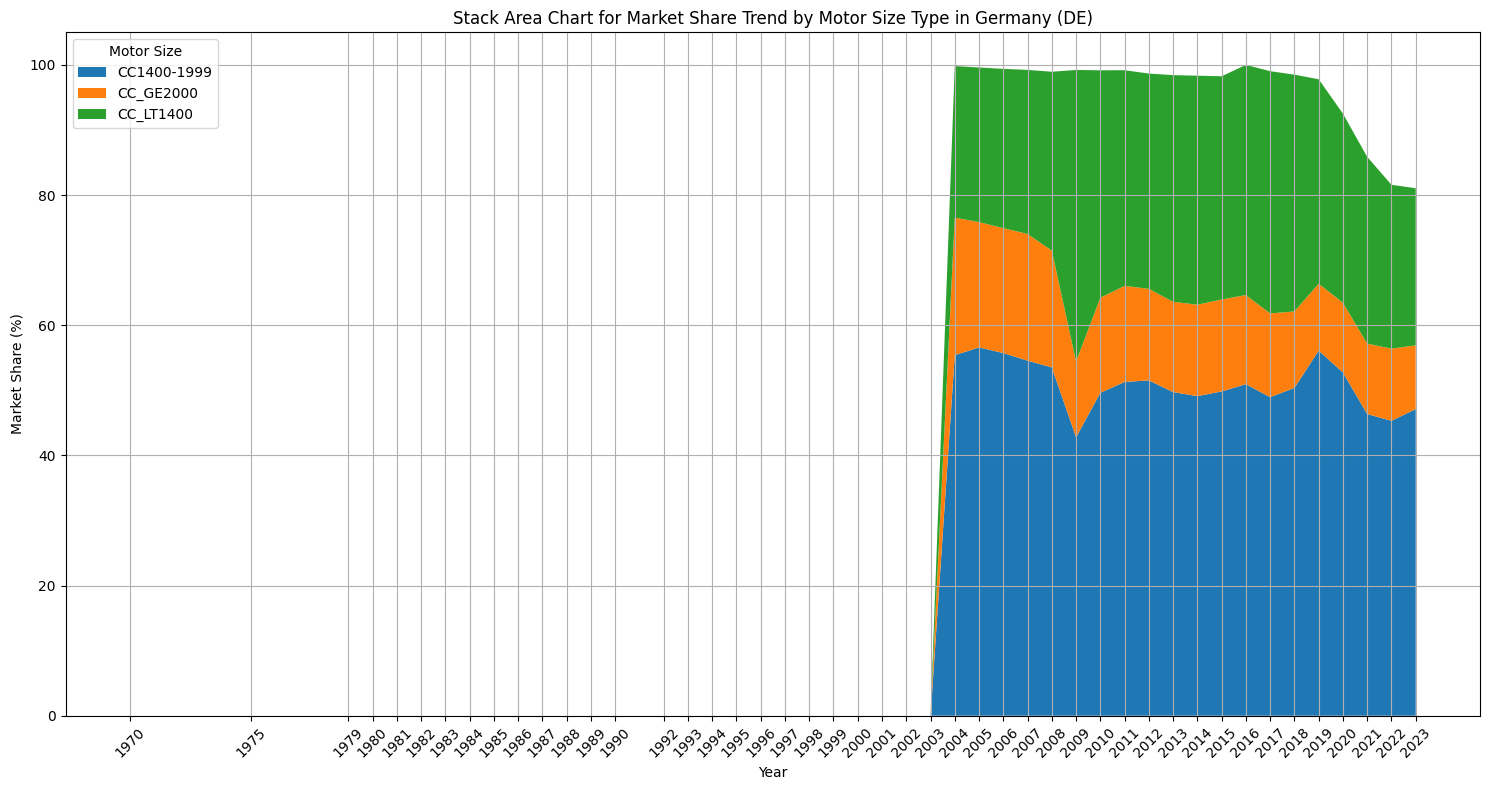

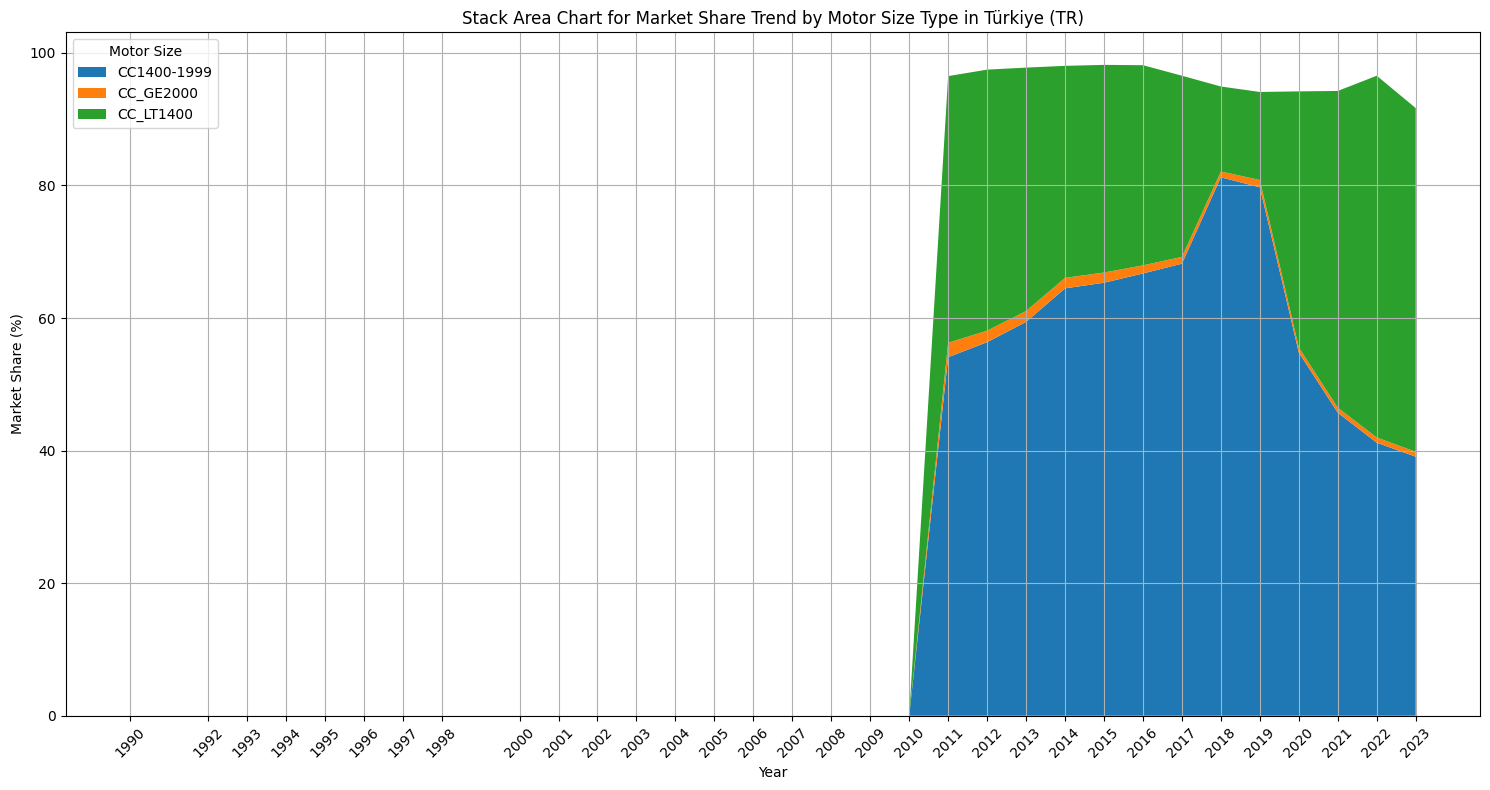

In [40]:
# --- 9. Stack Area Charts for Market Share Trends by Motor Size Type

df_de_market_share_for_stack = df_engine_market_share_corrected[df_engine_market_share_corrected['geo'] == 'DE'].copy()
df_tr_market_share_for_stack = df_engine_market_share_corrected[df_engine_market_share_corrected['geo'] == 'TR'].copy()

df_de_market_share_for_stack.dropna(subset=['market_share'], inplace=True)
df_tr_market_share_for_stack.dropna(subset=['market_share'], inplace=True)

df_de_market_share_for_stack.sort_values(by='year', inplace=True)
df_tr_market_share_for_stack.sort_values(by='year', inplace=True)

# 9.1 Germany (DE) - Motor Size Stacked Area Chart
de_pivot_data = df_de_market_share_for_stack.pivot_table(index='year', columns='engine', values='market_share', fill_value=0)

years_de = de_pivot_data.index
engine_types_de = de_pivot_data.columns

data_for_stack_de = [de_pivot_data[col].values for col in engine_types_de]

plt.figure(figsize=(15, 8))
plt.stackplot(years_de, *data_for_stack_de, labels=engine_types_de)
plt.title('Stack Area Chart for Market Share Trend by Motor Size Type in Germany (DE)')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.legend(title='Motor Size')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.xticks(df_de_market_share_for_stack['year'].unique(), rotation=45)
plt.tight_layout()
plt.show()

# 9.2 Türkiye (TR) - Motor Size Stacked Area Chart

tr_pivot_data = df_tr_market_share_for_stack.pivot_table(index='year', columns='engine', values='market_share', fill_value=0)

years_tr = tr_pivot_data.index
engine_types_tr = tr_pivot_data.columns

data_for_stack_tr = [tr_pivot_data[col].values for col in engine_types_tr]

plt.figure(figsize=(15, 8))
plt.stackplot(years_tr, *data_for_stack_tr, labels=engine_types_tr)
plt.title('Stack Area Chart for Market Share Trend by Motor Size Type in Türkiye (TR)')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.legend(title='Motor Size')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.xticks(df_tr_market_share_for_stack['year'].unique(), rotation=45)
plt.tight_layout()
plt.show()

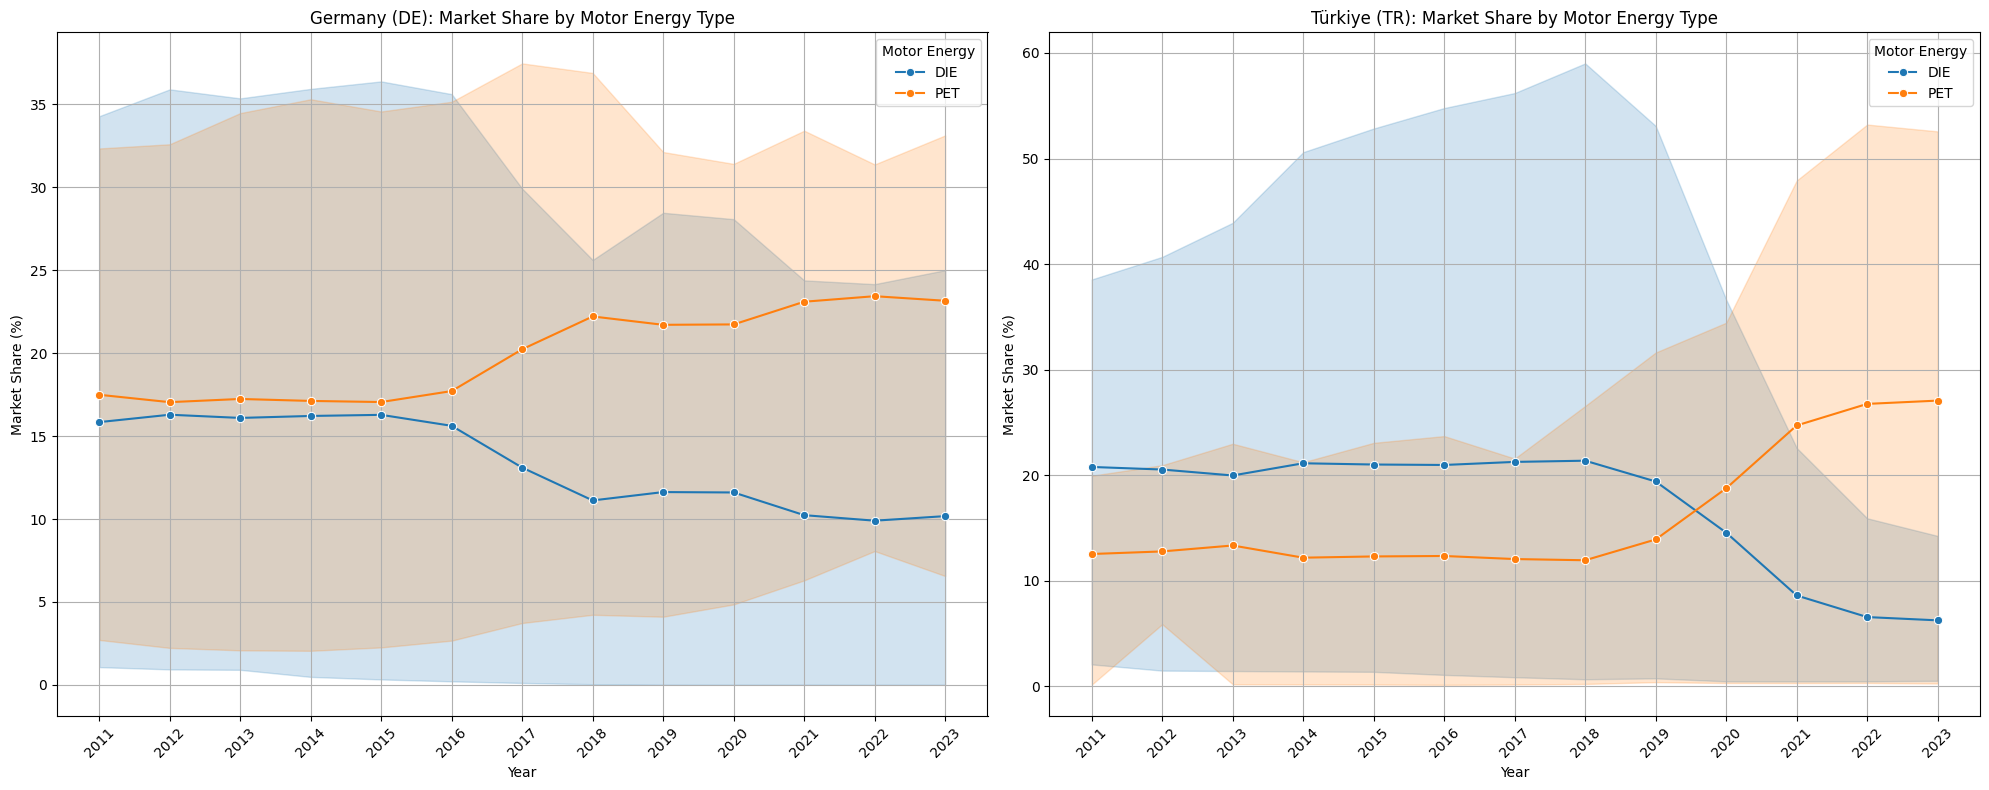

In [41]:
# Define a minimum year for plotting, as earlier years might have data gaps.
# For example, data after 2011 often shows better coverage.
min_year_for_plotting = 2011

# Filter data for Germany (DE) and Türkiye (TR) from df_merged
# Ensure to exclude 'TOTAL' mot_nrg categories and filter for valid market_share values.
# Also, include only years from the specified min_year_for_plotting.
df_de_plot = df_merged[(df_merged['geo'] == 'DE') &
                       (df_merged['mot_nrg'] != 'TOTAL') &
                       (df_merged['market_share'].notna()) & # Exclude rows where market_share is NaN
                       (df_merged['market_share'] != float('inf')) & # Exclude rows where market_share is infinity
                       (df_merged['total_geo_registrations'] > 0) & # Exclude rows where denominator is zero
                       (df_merged['year'] >= min_year_for_plotting) # Filter for years greater than or equal to min_year
                      ].copy() # .copy() to avoid SettingWithCopyWarning

df_tr_plot = df_merged[(df_merged['geo'] == 'TR') &
                       (df_merged['mot_nrg'] != 'TOTAL') &
                       (df_merged['market_share'].notna()) &
                       (df_merged['market_share'] != float('inf')) &
                       (df_merged['total_geo_registrations'] > 0) &
                       (df_merged['year'] >= min_year_for_plotting)
                      ].copy() # .copy() to avoid SettingWithCopyWarning

# Sort values by year for clean plotting
df_de_plot.sort_values(by='year', inplace=True)
df_tr_plot.sort_values(by='year', inplace=True)

# --- 10. Country Comparison: Motor Energy Market Share ---

# 10.1 Create a single figure with two subplots
# 1 row, 2 columns (side-by-side), figure size (width 20, height 8)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# 10.2 Germany Plot (First subplot: axes[0])
sns.lineplot(data=df_de_plot, x='year', y='market_share', hue='mot_nrg', marker='o', ax=axes[0])
axes[0].set_title('Germany (DE): Market Share by Motor Energy Type')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Market Share (%)')
axes[0].legend(title='Motor Energy')
axes[0].grid(True)
axes[0].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
if not df_de_plot['year'].empty:
    axes[0].set_xticks(df_de_plot['year'].unique())
axes[0].tick_params(axis='x', rotation=45)

# 10.3 Türkiye Plot (Second subplot: axes[1])
sns.lineplot(data=df_tr_plot, x='year', y='market_share', hue='mot_nrg', marker='o', ax=axes[1])
axes[1].set_title('Türkiye (TR): Market Share by Motor Energy Type')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Market Share (%)')
axes[1].legend(title='Motor Energy')
axes[1].grid(True)
axes[1].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
if not df_tr_plot['year'].empty:
    axes[1].set_xticks(df_tr_plot['year'].unique())
axes[1].tick_params(axis='x', rotation=45)

# 10.4 General layout adjustments
plt.tight_layout()
plt.show()

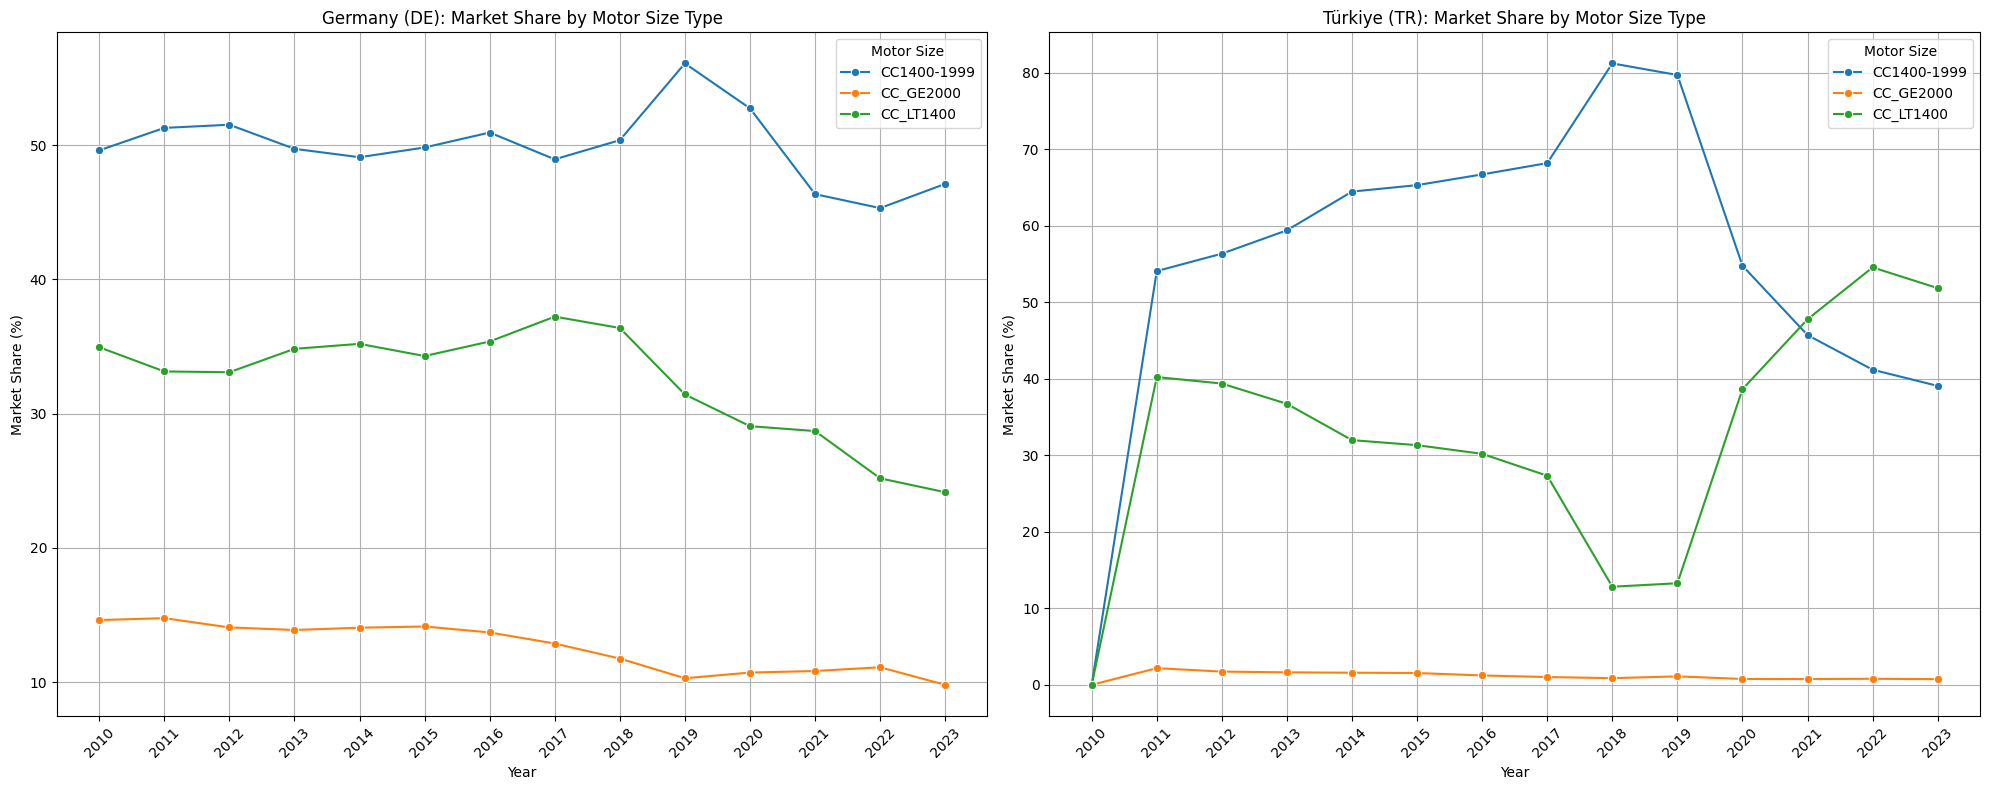

In [42]:
min_year_for_plotting = 2010

df_de_plot = df_engine_market_share_corrected[(df_engine_market_share_corrected['geo'] == 'DE') &
                       (df_engine_market_share_corrected['engine'] != 'TOTAL') &
                       (df_engine_market_share_corrected['market_share'].notna()) & 
                       (df_engine_market_share_corrected['market_share'] != float('inf')) & 
                       (df_engine_market_share_corrected['overall_total_registrations'] > 0) & 
                       (df_engine_market_share_corrected['year'] >= min_year_for_plotting) 
                      ].copy()

df_tr_plot = df_engine_market_share_corrected[(df_engine_market_share_corrected['geo'] == 'TR') &
                       (df_engine_market_share_corrected['engine'] != 'TOTAL') &
                       (df_engine_market_share_corrected['market_share'].notna()) &
                       (df_engine_market_share_corrected['market_share'] != float('inf')) &
                       (df_engine_market_share_corrected['overall_total_registrations'] > 0) &
                       (df_engine_market_share_corrected['year'] >= min_year_for_plotting)
                      ].copy() 

df_de_plot.sort_values(by='year', inplace=True)
df_tr_plot.sort_values(by='year', inplace=True)

# --- 11. Country Comparison: Motor Energy Market Share ---

# 11.1 Create a single figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# 11.2 Germany Plot (First subplot: axes[0])
sns.lineplot(data=df_de_plot, x='year', y='market_share', hue='engine', marker='o', ax=axes[0])
axes[0].set_title('Germany (DE): Market Share by Motor Size Type')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Market Share (%)')
axes[0].legend(title='Motor Size')
axes[0].grid(True)
axes[0].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
if not df_de_plot['year'].empty:
    axes[0].set_xticks(df_de_plot['year'].unique())
axes[0].tick_params(axis='x', rotation=45)

# 11.3 Türkiye Plot (Second subplot: axes[1])
sns.lineplot(data=df_tr_plot, x='year', y='market_share', hue='engine', marker='o', ax=axes[1])
axes[1].set_title('Türkiye (TR): Market Share by Motor Size Type')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Market Share (%)')
axes[1].legend(title='Motor Size')
axes[1].grid(True)
axes[1].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
if not df_tr_plot['year'].empty:
    axes[1].set_xticks(df_tr_plot['year'].unique())
axes[1].tick_params(axis='x', rotation=45)

# 11.4 General layout adjustments
plt.tight_layout()
plt.show()